In [1]:
import os
root_dir = '/home/tim/Dropbox/experimental/' # your path here where to parent directory where repos are
local_dir = '/home/tim/local/'
os.chdir(root_dir)
import sys
sys.path.append(root_dir)
import map_data.map_methods as mm
import shortest_path.shortest_methods as sm
import utils.global_methods as gm
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import psutil
import gc
import pickle
import shutil
import copy

In [20]:
levels_path

'map_data/astar_paths/v1/AirSimNH_2d_all.p'

In [2]:
levels_path = f'map_data/astar_paths/v1/AirSimNH_2d_all.p'
level_info = gm.pk_read(levels_path)

In [3]:
datamap = mm.DataMap('AirSimNH', 'V1')

In [6]:
roofs = []
for x in range(-240, 240):
    for y in range(-240, 240):
        roofs.append(datamap.get_roof(x, y))

In [8]:
np.min(roofs)

np.int64(-2)

In [10]:
n_p

46812

In [11]:
len(level_info['paths'])

46812

In [19]:
n_p = 0
for path_idx in range(len(level_info['paths'])):
    path = level_info['paths'][path_idx]
    for point in path:
        position = point['position']
        #y, x, z = position
        #z *= -1
        #point['position'] = [x, y, z]
        if datamap.in_object(x, y, z):
            n_p += 1
            break
n_p

0

In [18]:
gm.pk_write(level_info, levels_path)

In [2]:
data_dict = gm.pk_read('map_data/observations/DepthV1/AirSimNH/data_dict__alpha_-112_-80_2_-240_-208_2_4_8_4.p')

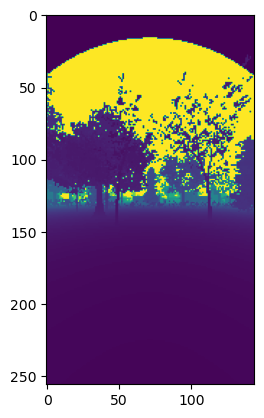

In [11]:
plt.imshow(data_dict[-112][-240][4][0][0])

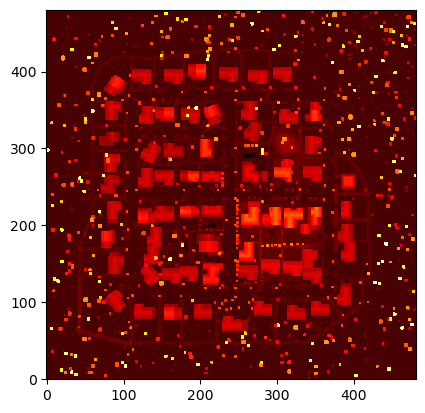

In [5]:
rooftops_path = 'map_data/rooftops/v1/AirSimNH.p'
rooftops_dict = pickle.load(open(rooftops_path, 'rb'))
rooftops_arr = []
for key in rooftops_dict:
    row = []
    for key2 in rooftops_dict[key]:
        row.append(rooftops_dict[key][key2])
    rooftops_arr.append(row)
rooftops_arr = np.array(rooftops_arr)
plt.imshow(rooftops_arr, cmap='hot', interpolation='nearest', origin='lower')

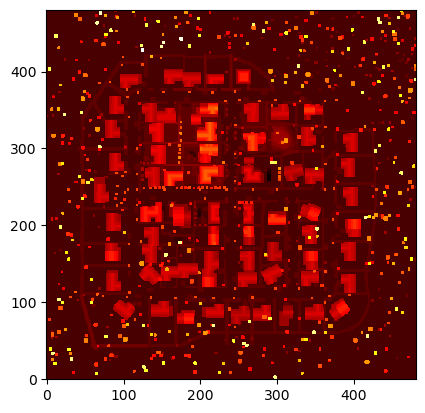

In [6]:
new_rooftops_dict = {}
for x in rooftops_dict:
    for y in rooftops_dict[x]:
        if y not in new_rooftops_dict:
            new_rooftops_dict[y] = {}
        new_rooftops_dict[y][x] = rooftops_dict[x][y]
new_rooftops_arr = []
for key in new_rooftops_dict:
    row = []
    for key2 in new_rooftops_dict[key]:
        row.append(new_rooftops_dict[key][key2])
    new_rooftops_arr.append(row)
new_rooftops_arr = np.array(new_rooftops_arr)
plt.imshow(new_rooftops_arr, cmap='hot', interpolation='nearest', origin='lower')

In [7]:
gm.pk_write(new_rooftops_dict, rooftops_path)

In [9]:
data_dict = gm.pk_read('map_data/observations/SceneV1/AirSimNH/data_dict__alpha_-112_-48_2_-112_-48_2_0_4_4.p')

FileNotFoundError: [Errno 2] No such file or directory: 'map_data/observations/DepthV1/AirSimNH/data_dict__alpha_-112_-48_2_-112_-48_2_0_4_4.p'

In [ ]:
data_dict[-112][-94][4]

In [12]:
d = data_dict[-112][-94][4]()

dict

In [ ]:
pdir = 'map_data/observations/'
for fname in os.listdir(pdir):
    if 'V' in fname:
        for fname2 in os.listdir(f'{pdir}{fname}/AirSimNH/'):
            old_path = f'{pdir}{fname}/AirSimNH/{fname2}'
            if fname2 in ['.ipynb_checkpoints']:
                shutil.rmtree(old_path)
                continue
            if 'conflicted' in fname2:
                os.remove(old_path)
                continue
            f_pre = fname2.split('__')[0]
            if f_pre in ['log', 'point_list']:
                os.remove(old_path)
                continue
            if '.' not in fname2:
                if fname2[-1] == 'p':
                    f_post = 'p'
                    fname2 = fname2[:-1]
                elif fname2[-4:] == 'json':
                    f_post = 'json'
                    fname2 = fname2[:-4]
            else:
                f_post = fname2.split('.')[1]
            part_name = fname2.split('__')[1].split('.')[0]
            parts = part_name.split('_')
            this_id_name = parts[0]
            xmin, xmax, xint, ymin, ymax, yint, zmin, zmax, zint = [int(part) for part in parts[1:]] 
            zmin, zmax, zint = 0, 4, 4
            parts = [str(component) for component in [xmin, xmax, xint, ymin, ymax, yint, zmin, zmax, zint]]
            new_part_name = f'{this_id_name}_' + '_'.join(parts)
            new_fname2 = f'{f_pre}__{new_part_name}.{f_post}'
            #print(old_path, f'{pdir}{fname}/AirSimNH/{new_fname2}')
            #i = input()
            new_path = f'{pdir}{fname}/AirSimNH/{new_fname2}'
            os.rename(old_path, new_path)

            if f_pre in ['data_dict']:
                data_dict = gm.pk_read(new_path)
                for x in data_dict:
                    for y in data_dict[x]:
                        data_dict[x][y][4] = copy.deepcopy(data_dict[x][y][-4].copy)
                        del data_dict[x][y][-4]
                gm.pk_write(data_dict, new_path)

In [ ]:
rt_dic, rt_arr = mm.load_rooftops('AirSimNH')
x = 240
y = -120
z = -4
x_bounds = [-240, 240]
y_bounds = [-240, 240]
z_bounds = [-40, 0]
collision_threshold = 2

datamap = mm.DataMap('AirSimNH')

In [ ]:
sw = gm.Stopwatch()
for i in range(10_000_000):
    collision = datamap.in_object(x, y, z) 
sw.stop()

In [ ]:
sw = gm.Stopwatch()
for i in range(10_000_000):
    collision = z <= rt_dic[x][y] + collision_threshold
sw.stop()

In [ ]:
sw = gm.Stopwatch()
for i in range(10_000_000):
    bounds = datamap.out_of_bounds(x, y, z, x_bounds, y_bounds, z_bounds) 
sw.stop()

In [ ]:
sw = gm.Stopwatch()
for i in range(10_000_000):
    check = x < x_bounds[0] or x > x_bounds[1] or y < y_bounds[0] or y > y_bounds[1] or z < z_bounds[0] or z > z_bounds[1]
sw.stop()

In [ ]:
gm.check_ram('init')
# set coordinate ranges (only use increments of 2 as that is the current map resolution)
x_vals = [x for x in range(-32, 32, 2)] # example range
y_vals = [y for y in range(0, 2, 2)] # example range
z_vals = [z for z in range(-4, 0, 4)] # example range
yaw_vals = [0] # example range (looking forward -- can be a list of 0-forward 1-right 2-backward 3-left)
coordinates = []
for x in x_vals:
    for y in y_vals:
        for z in z_vals:
            for yaw in yaw_vals:
                coordinates.append([x, y, z, yaw])
map_name = 'AirSimNH' # Blocks or AirSimNH
# rename titles on subplots in animation from key (sensor_name above) to value (shown in title of plot)
sensor_psuedonames = {
    'DepthV1':'Depth',
    'DepthV2':'Depth',
    'DepthV3':'Belly Depth',
    'DepthV4':'Belly Depth',
    'DepthV5':'Depth',
    'DepthV6':'Depth',
    'SceneV1':'RGB', 
    'SceneV1':'Belly RGB', 
    'SceneV3':'Rain',
    'SceneV4':'Snow',
    'SceneV5':'Fog',
    'SegmentationV1':'Segmentation', # forward RGB fog 144x256 resolution
    'MasksV1':'Object Mask', # splits each individual object into bool array
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_1':'DNN scale=1',
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_0d0312':'DNN scale=1/32',
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_2':'DNN scale=2',
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_6':'DNN scale=6',
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_8':'DNN scale=8',
    #'DepthV1__DGNLNet__AirSimNH_v3__scale_10':'DNN scale=10',
}
# here list the sensor_names of data you want to fetch at all of the coordinates that specified above
# make sure you have dropped all of the data you need from the DropBox into the proper directory in your github repo
    # map_data/observations/sensor_name/map_name/data...
sensor_names = [
    'SceneV1',
    #'BoxesV1', # will draw boxes on sensor above this in list (SceneV1)
    #'SceneV3',
    #'SceneV4',
    #'SceneV5',
    'DepthV1',
]
resolution=[144,256] # height, width of observation arrays (images) -- for viewing purposes only

# fetch data from coordinates
location_data, location_animation = datamap.data_at_coordinates(sensor_names, coordinates, 
                    make_animation=False, return_data=True, ncols=2, resolution=resolution, sensor_psuedonames=sensor_psuedonames)
gm.check_ram('data fetch')
datamap.clear_cache()
gm.check_ram('clear cache')
del location_data
gm.check_ram('delete local')

In [ ]:
gm.check_ram('init')
data = datamap.get_data(
    sensor_names = [ # name of sensors to fetch data, see README for available sensors -- names such as 'SceneV1' and 'SegmentationV1'
        'SceneV1',  # SceneV1 is monocular forward facing RGB at 144x256 resolution
        'DepthV1',  # DepthV1 is forward facing 2d depth map at 144x256 resolution
    ],
    sample_size = 1000, # number of data instances to fetch (None to use all available)
    pull_from_end = False, # sample from beginning of pre-shuffled data points to keep holdout test set seperate
)
gm.check_ram('data fetch')

In [ ]:
data

In [ ]:
datamap.clear_cache()
gm.check_ram('datamap cache')

In [ ]:
data.clear()
data = {x:np.full((10000, 10000), 1, dtype=float) for x in range(1)}
data.clear()
gm.check_ram('data clear')

In [ ]:
gc.collect()
gm.check_ram('garbage collect')

In [ ]:
del datamap
gm.check_ram('obj del')

In [ ]:
del data
gm.check_ram('data del')

In [ ]:
obj = datamap

# Get memory size
size = sys.getsizeof(obj)
print(f"Size of object: {size*1e-9:0.2f} gb")

def get_deep_size(obj, seen=None):
    """Recursively finds the size of Python objects in bytes."""
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)
    size = sys.getsizeof(obj)
    if isinstance(obj, dict):
        size += sum([get_deep_size(v, seen) + get_deep_size(k, seen) for k, v in obj.items()])
    elif hasattr(obj, '__dict__'):
        size += get_deep_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_deep_size(i, seen) for i in obj])
    return size

# Get all parameters
print("Parameters:")
for attr_name in dir(obj):
    attr = getattr(obj, attr_name)
    if not callable(attr) and not isinstance(attr, dict):
        print(f'{attr_name} {sys.getsizeof(attr)*1e-9:0.2f} gb')
    elif not callable(attr):
        print(f'{attr_name} {get_deep_size(attr)*1e-9:0.2f} gb')

In [ ]:
gm.check_ram('clear cache')

In [ ]:
del location_data
del location_animation
gm.check_ram('clear cache')

In [ ]:
globals().keys()

In [ ]:
class dummy:
    def __init__(self):
        pass
    def check(self):
        gm.check_ram('init')
        pdir = 'map_data/observations/SceneV1/AirSimNH/'
        self.dic = {}
        n_files = 0
        for file_name in os.listdir(pdir):
            if 'data_dict' not in file_name:
                continue
            self.dic[file_name] = pickle.load(open(f'{pdir}{file_name}', 'rb')))
            n_files += 1
            if n_files >= 10:
                break
        gm.check_ram('dict')
        for key in self.dic:
            for x in self.dic[key]:
                for y in self.dic[key][x]:
                    for z in self.dic[key][x][y]:
                        for yaw in self.dic[key][x][y][z]:
                            self.dic[key][x][y][z][yaw] = None
        self.dic.clear()
        gm.check_ram('clear dict')
        gc.collect()
        gm.check_ram('garbage collect')
dd = dummy()
dd.check()
gm.check_ram('post call')
gc.collect()
gm.check_ram('garbage collect')

In [ ]:
gm.check_ram('before gc')
gc.collect()
gm.check_ram('after gc')

In [ ]:
globals().keys()

In [ ]:
gm.check_ram('post call')

In [ ]:
gm.check_ram('init')
a = np.full((10000, 10000), 1, dtype=float)
b = np.full((10000, 10000), 1, dtype=float)
c = np.full((10000, 10000), 1, dtype=float)
d = np.full((10000, 10000), 1, dtype=float)
gm.check_ram('arrs')
dic = {
    'a':a,
    'b':b,
    'c':c,
    'd':d,
}
gm.check_ram('dict')
dic.clear()
gm.check_ram('clear dict')
del a
del b
del c
del d
gm.check_ram('del arrs')

In [ ]:
gm.check_ram('init')
a = np.full((10000, 10000), 1, dtype=float)
b = np.full((10000, 10000), 1, dtype=float)
c = np.full((10000, 10000), 1, dtype=float)
d = np.full((10000, 10000), 1, dtype=float)
gm.check_ram('arrs')
lis = [
    a,
    b,
    c,
    d,
]
gm.check_ram('list')
lis.clear()
gm.check_ram('clear list')
del a
del b
del c
del d
gm.check_ram('del arrs')

In [ ]:
gm.check_ram('init')
dic = {
}
gm.check_ram('dict')
for i in range(5):
    a = np.full((10000, 10000), 1, dtype=float)
    dic[i] = a
gm.check_ram('full dict')
dic.clear()
gm.check_ram('clear dict')

In [ ]:
gm.check_ram('begin')
def scope():
    gm.check_ram('init')
    dic = {
    }
    gm.check_ram('dict')
    for i in range(5):
        a = np.full((10000, 10000), 1, dtype=float)
        dic[i] = a
    gm.check_ram('full dict')
    dic.clear()
    gm.check_ram('clear dict')
scope()
gm.check_ram('end')

In [ ]:
d = {}
for x in range(1_000):
    d[x] = {}
    for y in range(1_000):
        d[x][y] = {}
        for z in range(1):
            d[x][y][z] = {}
            for yaw in range(4):
                d[x][y][z][yaw] = random.random()

In [ ]:
sw = gm.Stopwatch()
x = 4320
y = -1
z = 0
yaw = 2
for i in range(10_000_000):
    exists = x in d and y in d[x] and z in d[x][y] and yaw in d[x][y][z]
sw.stop()

In [ ]:
sw = gm.Stopwatch()
x = 4320
y = -1
z = 0
yaw = 2
for i in range(10_000_000):
    try:
        d[x][y][z][yaw]
        exists = True
    except:
        exists = False
sw.stop()